In [17]:
import pandas as pd
import numpy as np
from mlgear.utils import show
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [18]:
battlegrounds = ['Georgia', 'Texas', 'Ohio', 'Michigan', 'Pennsylvania', 'Maine', 'Iowa', 'South Carolina',
                 'North Carolina', 'Florida', 'Colorado', 'Nebraska', 'Arizona', 'Alaska', 'New Mexico',
                 'Nevada', 'National', 'Wisconsin']

def plot_polls(polls, grouper, election='president', year=2020, day_filter=30, count_filter=10,
               battlegrounds=battlegrounds):
    if not isinstance(grouper, list):
        grouper = [grouper]
    disp = polls[(polls['year'] == year) &
                 (polls['days_until'] < day_filter) &
                 (polls['election'] == election) &
                 (polls['state'].isin(battlegrounds))]
    disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])
    disp = disp.groupby(['election'] + grouper)
    disp = disp[['polled_margin', 'actual_margin', 'margin_diff', 'margin_abs_diff2']]
    disp = disp.agg(['mean', 'std', 'count']).reset_index()
    disp.columns = ['election'] + grouper + ['polled_margin_mean', 'polled_margin_std', 'polled_margin_count',
                   'actual_margin_mean', 'actual_margin_count', 'actual_margin_std', 'margin_diff_mean',
                   'margin_diff_std', 'margin_diff_count', 'margin_abs_diff2_mean', 'margin_abs_diff2_std',
                   'margin_abs_diff2_count']
    disp = disp[disp['margin_abs_diff2_count'] > count_filter]
        
    if disp.shape[0] > 0:
        show(disp.sort_values('margin_abs_diff2_mean', ascending=False)[grouper + ['polled_margin_mean',
                                                                        'actual_margin_mean', 'margin_diff_mean',
                                                                        'polled_margin_count']].reset_index(drop=True),
             max_rows=None)

        if len(grouper) == 2:
            disp = disp.sort_values([grouper[0], 'margin_abs_diff2_mean'])
        else:
            disp = disp.sort_values('margin_abs_diff2_mean')
        meanx = disp['margin_abs_diff2_mean'].values
        stdx = disp['margin_abs_diff2_std'].values
        nx = disp['margin_abs_diff2_count'].values
        labels = [l + ' (N={})'.format(nx[i]) for i, l in enumerate([' '.join(x) for x in disp[grouper].values])]
        cis_80 = 1.282 * (stdx / np.sqrt(nx))
        x_pos = [i for i, _ in enumerate(labels)]

        plt.figure(figsize=(20, int(len(labels))))
        for zone in ['ytick', 'xtick']:
            plt.rc(zone, labelsize=14)
            
        plt.barh(x_pos, meanx, color='green', xerr=cis_80)
        plt.yticks(x_pos, labels)
        plt.xlabel('Average Absolute Difference Between Polled and Actual Margin for {} {} (lower = better)'.format(election.title(), year),
                   fontsize=14)
        plt.show()

## Load Polls

In [19]:
polls = pd.read_csv('polls.csv')
polls

,election,state,year,stage,dem_candidate,pollster,N,methodology,population,days_until,...,dem_actual,rep_actual,ind_actual,dem_diff,rep_diff,polled_margin,actual_margin,margin_diff,margin_abs_diff,538grade_simple
0,president,Alabama,2004,general,NoName,SurveyUSA,735,Unknown,Unknown,6,...,37.099698,62.900302,-1.0,3.900302,-3.900302,-18.0,-25.800604,7.800604,7.800604,Unknown
1,president,Alabama,2004,general,NoName,Capital Survey,645,Unknown,Unknown,19,...,37.099698,62.900302,-1.0,0.900302,-0.900302,-24.0,-25.800604,1.800604,1.800604,Unknown
2,president,Alabama,2004,general,NoName,SurveyUSA,699,Unknown,Unknown,30,...,37.099698,62.900302,-1.0,-1.099698,1.099698,-28.0,-25.800604,-2.199396,2.199396,Unknown
3,president,Alabama,2004,general,NoName,Mobile Register,619,Unknown,Unknown,33,...,37.099698,62.900302,-1.0,-5.599698,5.599698,-37.0,-25.800604,-11.199396,11.199396,Unknown
4,president,Alabama,2004,general,NoName,ARG,699,Unknown,Unknown,47,...,37.099698,62.900302,-1.0,5.900302,-5.900302,-14.0,-25.800604,11.800604,11.800604,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27114,governor,Louisiana,2019,general,Edwards,Cygnal,800,IVR/Online/Live/Text,Unknown,8,...,51.330000,48.670000,0.0,-0.230000,0.230000,2.2,2.660000,-0.460000,0.460000,B
27115,governor,Louisiana,2019,general,Edwards,Targoz Market Research,640,Online,Unknown,6,...,51.330000,48.670000,0.0,0.670000,-0.670000,4.0,2.660000,1.340000,1.340000,C
27116,governor,Louisiana,2019,general,Edwards,Edgewater Research/My People Vote,661,IVR,Unknown,5,...,51.330000,48.670000,0.0,-1.180000,1.180000,0.3,2.660000,-2.360000,2.360000,C
27117,governor,Louisiana,2019,general,Edwards,JMC Analytics,600,IVR/Live/Text,Unknown,3,...,51.330000,48.670000,0.0,-1.080000,1.080000,0.5,2.660000,-2.160000,2.160000,C


## 538 Grade

## President 2020 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               A            3.887755           -1.263561          5.151317   
1               B            3.540411           -0.915682          4.456093   
2               C            3.385036           -0.798578          4.183614   
3             D/F            2.895833           -1.169520          4.065353   

   polled_margin_count  
0                   98  
1                  146  
2                  139  
3                  192  
(4, 5)


<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


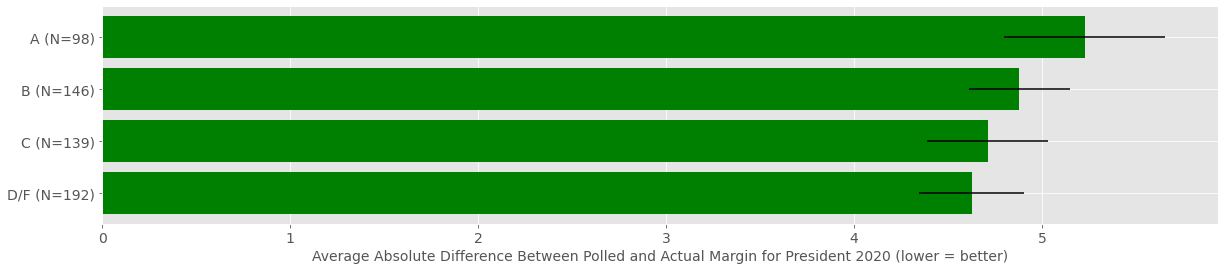

-
## Senate 2020 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             D/F            4.254286           -2.651643          6.905929   
1               A            2.864262           -3.079742          5.944004   
2               B            2.659677           -2.420833          5.080510   
3               C            3.940909           -1.087799          5.028708   

   polled_margin_count  
0                   35  
1                   61  
2                   62  
3                   66  
(4, 5)


<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


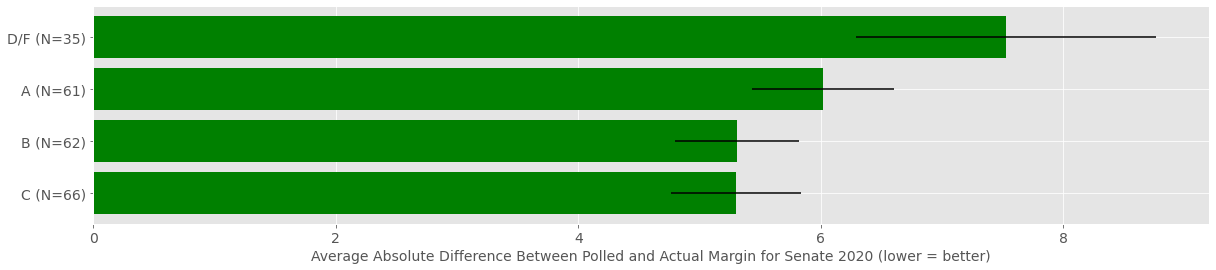

-
## Governor 2020 ##
-
## Gcb 2020 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               B            9.500000            3.100000          6.400000   
1               C            7.003478            3.100000          3.903478   

   polled_margin_count  
0                   16  
1                   46  

<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])



(2, 5)


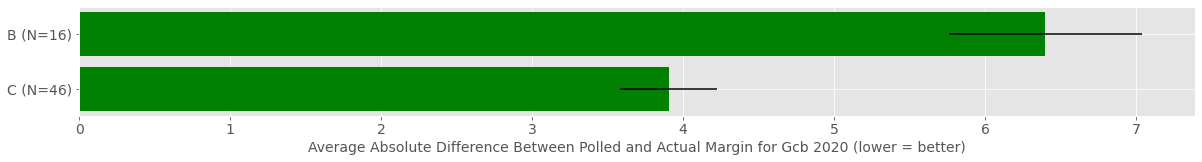

-
## President 2018 ##
-
## Senate 2018 ##


<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               C            1.255372            2.112392         -0.857020   
1               A            2.536744            2.174037          0.362707   
2               B            5.630545            4.486278          1.144267   
3             D/F            2.258065            3.726216         -1.468151   

   polled_margin_count  
0                  121  
1                   43  
2                   55  
3                   31  
(4, 5)


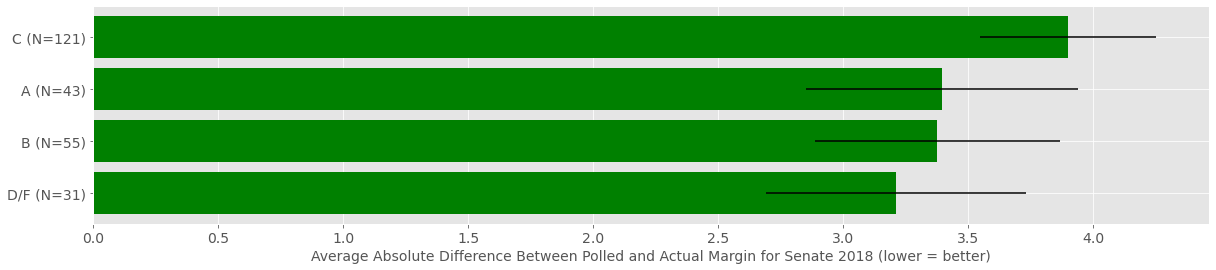

-
## Governor 2018 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             D/F            1.976923            3.000769         -1.023846   
1               C            0.058163           -0.773061          0.831224   
2               B            0.162963            0.435556         -0.272593   
3               A            0.949000           -0.790500          1.739500   

   polled_margin_count  
0                   13  
1                   49  
2                   27  
3                   20  

<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])



(4, 5)


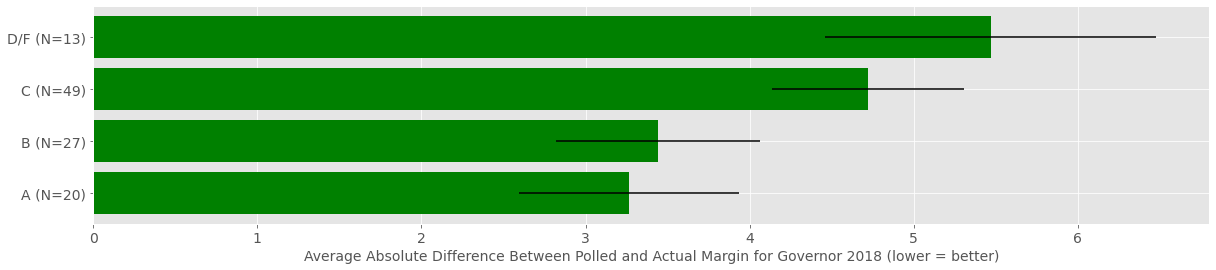

-
## Gcb 2018 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               C            7.358209            8.600000         -1.241791   
1               B            7.144928            8.600000         -1.455072   
2               A            8.400000            8.600000         -0.200000   

   polled_margin_count  
0                   67  
1                   69  
2                   19  
(3, 5)


<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


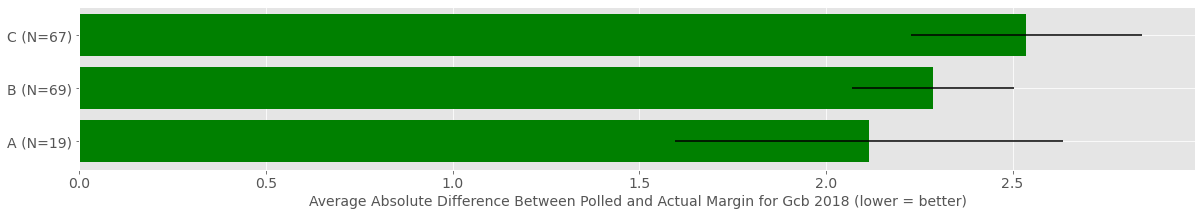

-
## President 2016 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               C            1.537632           -1.878816          3.416447   
1             D/F            0.331447           -2.606447          2.937895   
2               B            1.101923           -2.432500          3.534423   
3               A           -0.086486           -2.832162          2.745676   

   polled_margin_count  
0                   76  
1                   76  
2                   52  
3                   37  
(4, 5)


<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


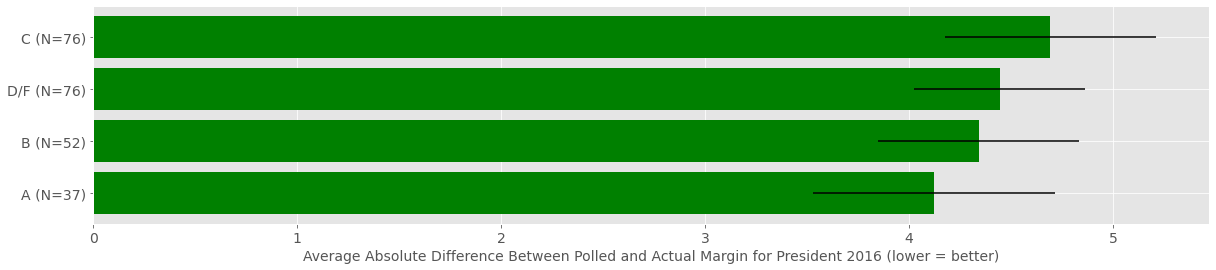

-
## Senate 2016 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             D/F           -5.066667           -8.827333          3.760667   
1               C           -1.243137           -4.972157          3.729020   
2               B           -3.700000           -7.699524          3.999524   
3               A           -5.370000           -6.919667          1.549667   

   polled_margin_count  
0                   30  
1                   51  
2                   42  
3                   30  
(4, 5)


<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


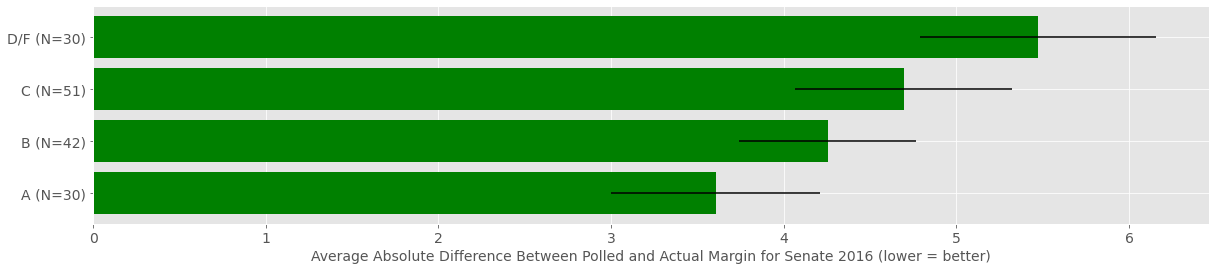

-
## Governor 2016 ##
-
## Gcb 2016 ##
-


<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


In [20]:
for y in [2020, 2018, 2016]:
    for p in ['president', 'senate', 'governor', 'GCB']:
        print('## {} {} ##'.format(p.title(), y))
        plot_polls(polls[polls['538grade_simple'] != 'Unknown'], grouper='538grade_simple', election=p, year=y)
        print('-')

## President 2020 ##


<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


             state 538grade_simple  polled_margin_mean  actual_margin_mean  \
0             Ohio               B            2.500000           -8.031962   
1        Wisconsin               A           10.185714            0.627100   
2             Iowa               A            1.100000           -8.152965   
3             Iowa             D/F            0.333333           -8.152965   
4             Iowa               C           -0.250000           -8.152965   
5             Iowa               B           -0.275000           -8.152965   
6        Wisconsin             D/F            8.206667            0.627100   
7          Florida               A            3.416667           -3.358369   
8         Nebraska             D/F          -12.375000          -19.057532   
9         Michigan               C            8.261538            2.783528   
10       Wisconsin               B            7.200000            0.627100   
11       Wisconsin               C            6.861538          

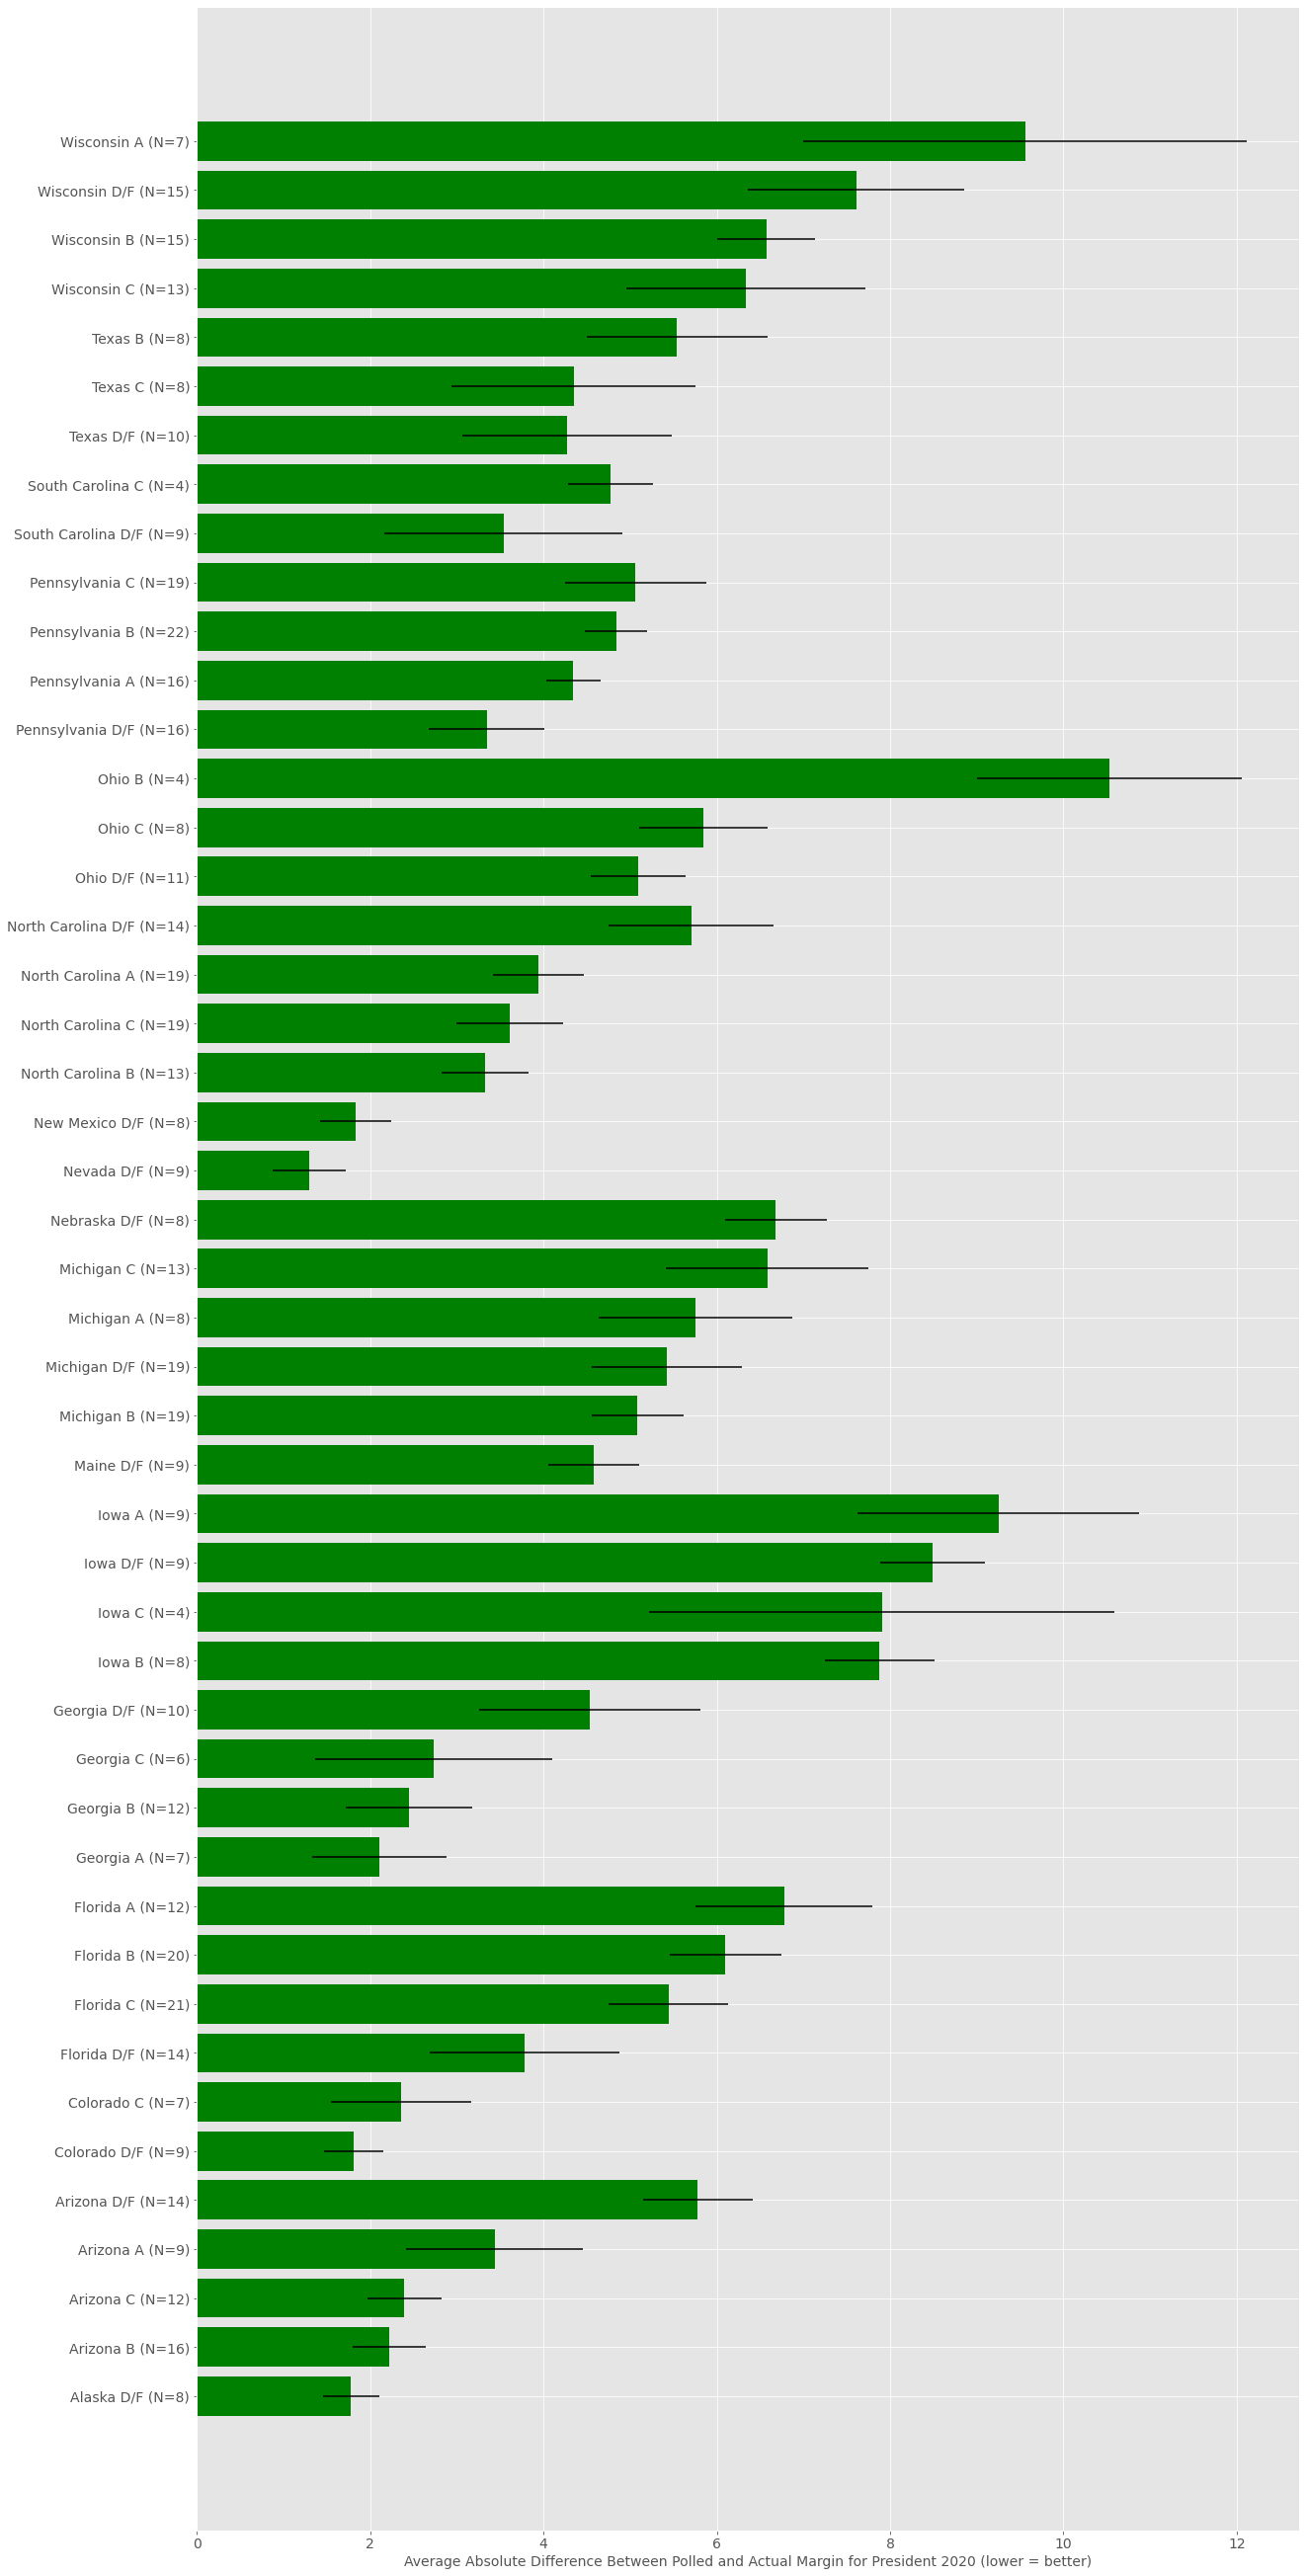

-
## Senate 2020 ##
             state 538grade_simple  polled_margin_mean  actual_margin_mean  \
0            Maine             D/F            6.000000           -8.501941   
1            Maine               A            1.560000           -8.501941   
2         Michigan               C            9.366667            1.685031   
3             Iowa               B            1.137500           -6.478210   
4             Iowa               A            1.113333           -6.478210   
5   South Carolina               C           -2.860000          -10.270311   
6   North Carolina               A            4.378571           -1.746737   
7          Arizona               B            7.662500            2.348697   
8         Michigan             D/F            5.711111            1.685031   
9   North Carolina               C            3.820000           -1.746737   
10         Arizona             D/F            7.700000            2.348697   
11        Michigan               B          

<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


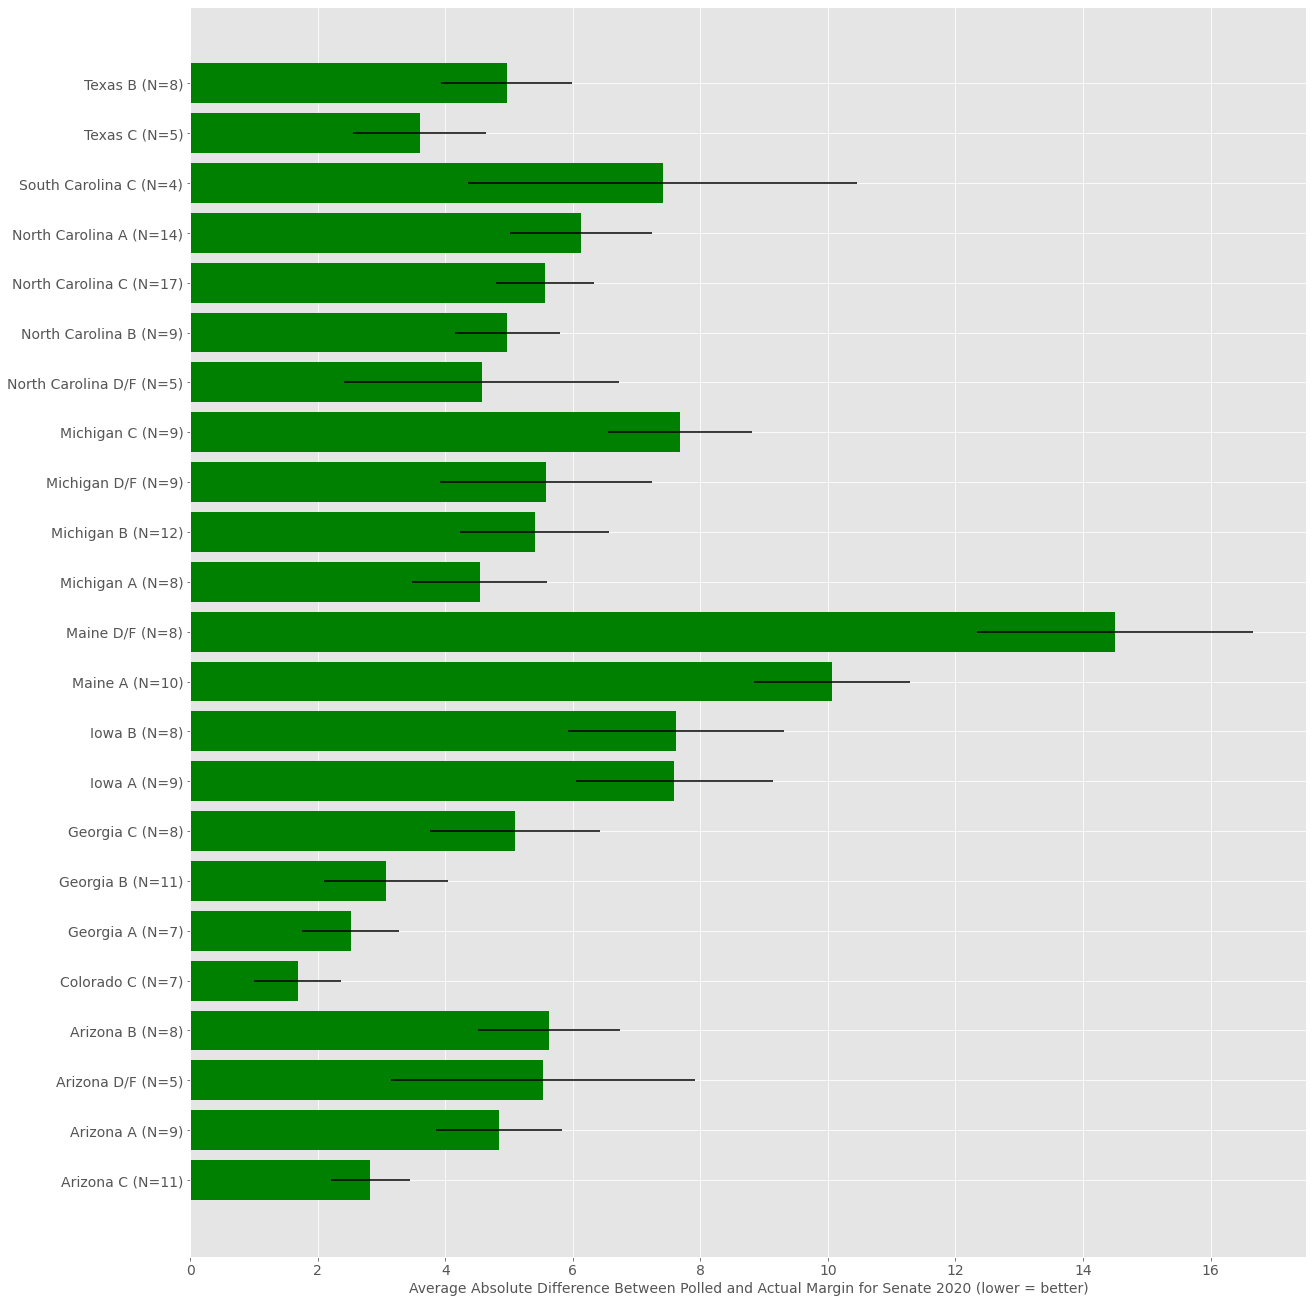

-
## Governor 2020 ##
-
## President 2018 ##
-
## Senate 2018 ##
        state 538grade_simple  polled_margin_mean  actual_margin_mean  \
0        Ohio               C           14.250000            6.842886   
1      Nevada               B           -1.850000            5.028496   
2    Michigan               C           12.540000            6.502801   
3        Ohio               B           12.200000            6.842886   
4     Florida               A            5.116667           -0.121460   
5     Arizona               C           -1.596000            2.346477   
6       Texas             D/F           -4.450000           -2.563623   
7      Nevada               A            0.582000            5.027594   
8      Nevada               C            1.372222            5.027828   
9    Michigan               B           10.000000            6.502801   
10      Texas               C           -5.863636           -2.565270   
11    Florida               B            3.114286          

<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


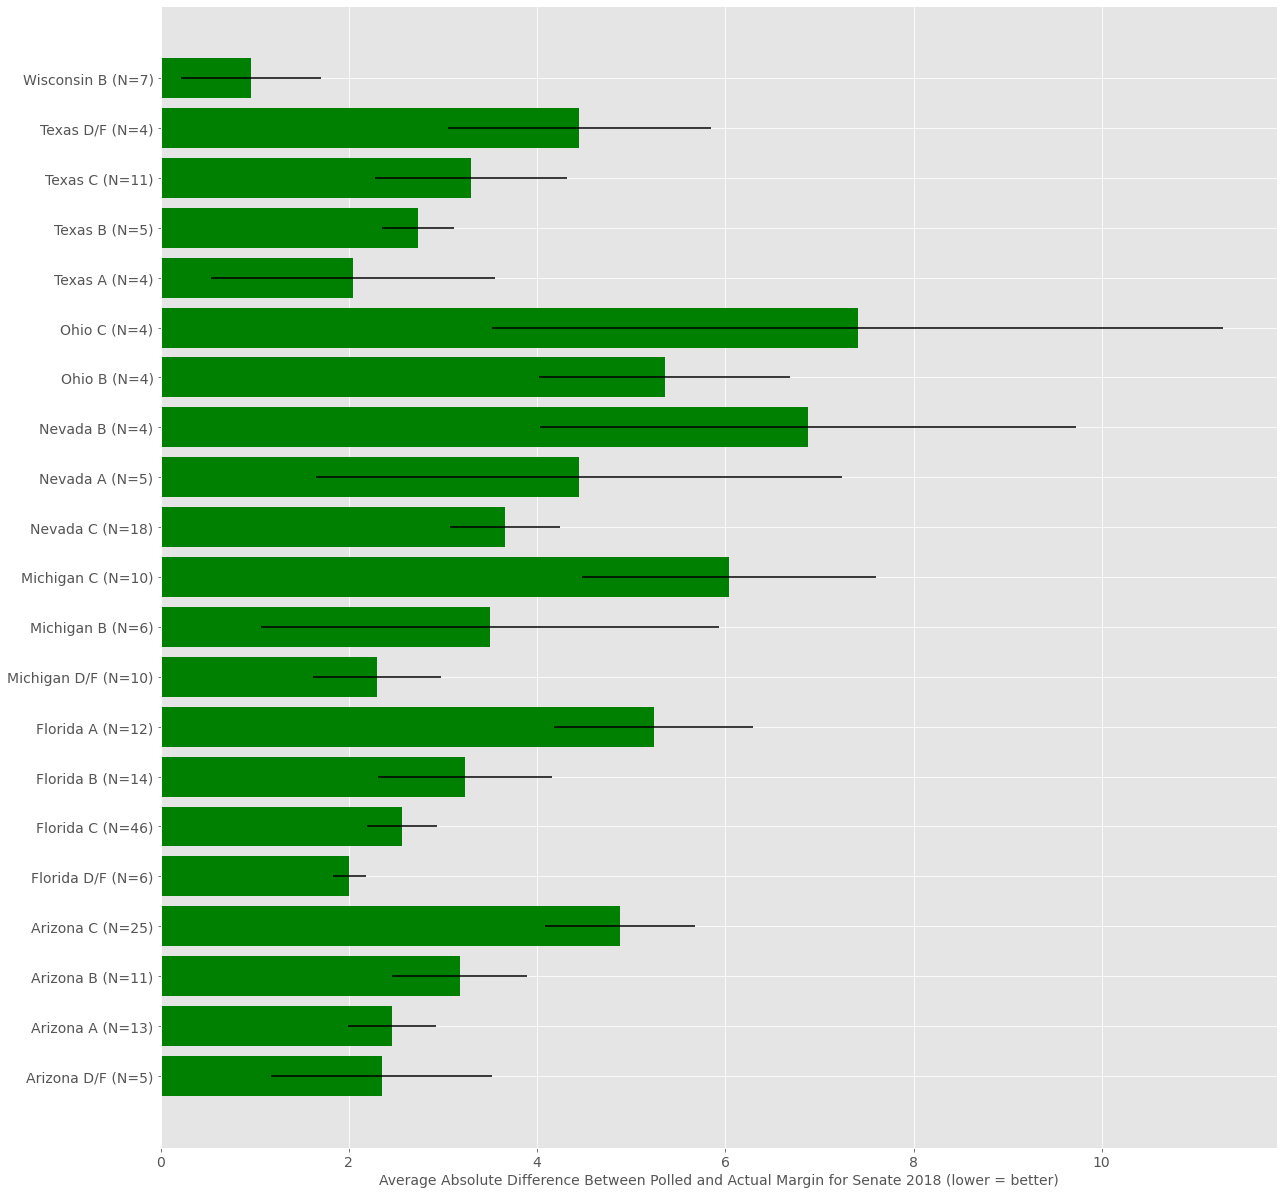

-
## Governor 2018 ##
      state 538grade_simple  polled_margin_mean  actual_margin_mean  \
0   Florida               A            4.336000           -0.400000   
1   Arizona               C          -15.237500          -14.160000   
2   Florida               B            3.771429           -0.400000   
3   Florida               C            2.916667           -0.400000   
4    Nevada               C            0.380000            4.080000   
5  Michigan               C           10.250000            9.560000   
6  Michigan             D/F            8.700000            9.560000   

   margin_diff_mean  polled_margin_count  
0          4.736000                    5  
1         -1.077500                    8  
2          4.171429                    7  
3          3.316667                   18  
4         -3.700000                    5  
5          0.690000                    4  
6         -0.860000                    4  
(7, 6)


<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


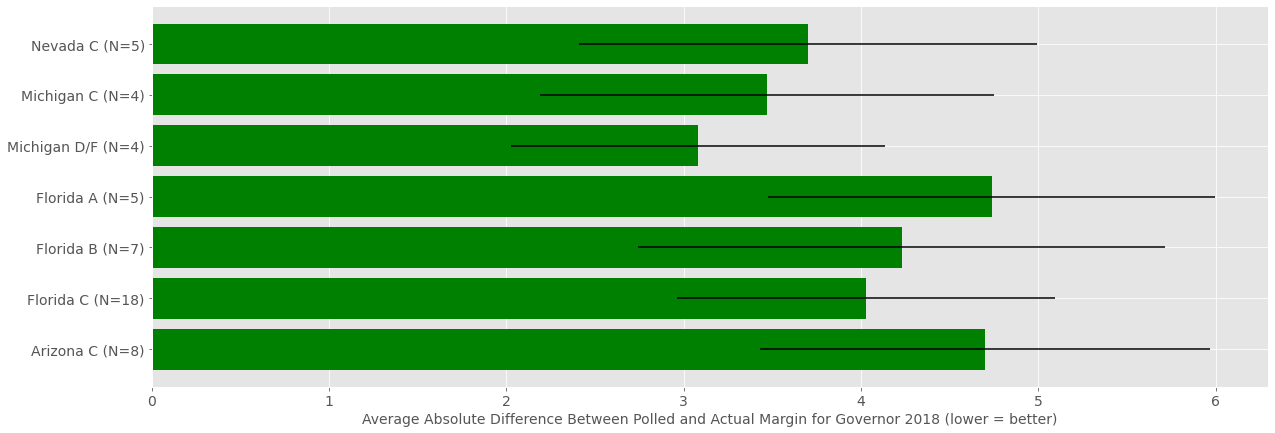

-


In [21]:
for y in [2020, 2018]:
    for p in ['president', 'senate', 'governor']:
        print('## {} {} ##'.format(p.title(), y))
        plot_polls(polls[polls['538grade_simple'] != 'Unknown'],
                   grouper=['state', '538grade_simple'], election=p, year=y, count_filter=3)
        print('-')

  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             D/F            8.206667            0.627100          7.579567   
1               B            7.200000            0.627100          6.572900   
2               C            6.861538            0.627100          6.234439   

   polled_margin_count  
0                   15  
1                   15  
2                   13  
(3, 5)


<ipython-input-18-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


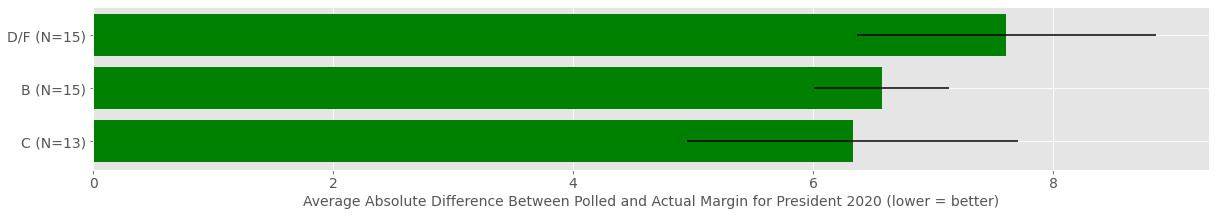

In [26]:
plot_polls(polls[(polls['538grade_simple'] != 'Unknown') & (polls['state'] == 'Wisconsin')],
           grouper='538grade_simple', election='president', year=2020)

In [23]:
plot_polls(polls[(polls['538grade_simple'] != 'Unknown') & (polls['state'] == 'Iowa')],
           grouper='538grade_simple', election='President', year=2020)

In [25]:
polls[polls['state'] == 'Wisconsin']

,election,state,year,stage,dem_candidate,pollster,N,methodology,population,days_until,...,dem_actual,rep_actual,ind_actual,dem_diff,rep_diff,polled_margin,actual_margin,margin_diff,margin_abs_diff,538grade_simple
754,president,Wisconsin,2004,general,NoName,Zogby,700,Unknown,Unknown,1,...,50.19188,49.80812,-1.0,2.80812,-2.80812,6.0,0.383761,5.616239,5.616239,Unknown
755,president,Wisconsin,2004,general,NoName,Strategic Vision (R),896,Unknown,Unknown,2,...,50.19188,49.80812,-1.0,-1.19188,1.19188,-2.0,0.383761,-2.383761,2.383761,Unknown
756,president,Wisconsin,2004,general,NoName,FOX News,799,Unknown,Unknown,2,...,50.19188,49.80812,-1.0,-1.69188,1.69188,-3.0,0.383761,-3.383761,3.383761,Unknown
757,president,Wisconsin,2004,general,NoName,CNN/USAT/Gallup,123,Unknown,Unknown,3,...,50.19188,49.80812,-1.0,-4.19188,4.19188,-8.0,0.383761,-8.383761,8.383761,Unknown
758,president,Wisconsin,2004,general,NoName,Mason-Dixon,724,Unknown,Unknown,4,...,50.19188,49.80812,-1.0,0.80812,-0.80812,2.0,0.383761,1.616239,1.616239,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26787,governor,Wisconsin,2018,general,Evers,Marquette University Law School,1154,Live Phone,Unknown,11,...,49.54000,48.44000,0.0,0.46000,1.56000,0.0,1.100000,-1.100000,1.100000,B
26914,senate,Wisconsin,2018,general,Baldwin,Emerson College,604,IVR/Online/Text,Unknown,7,...,55.36000,44.53000,0.0,-1.01000,1.12000,8.7,10.830000,-2.130000,2.130000,A
26928,governor,Wisconsin,2018,general,Evers,Emerson College,604,IVR/Online/Text,Unknown,7,...,49.54000,48.44000,0.0,2.86000,-0.84000,4.8,1.100000,3.700000,3.700000,A
27004,senate,Wisconsin,2018,general,Baldwin,Research Co.,450,Online,Unknown,4,...,55.36000,44.53000,0.0,0.14000,-0.03000,11.0,10.830000,0.170000,0.170000,B
